In [ ]:
! ls /content/drive/MyDrive/outss/

im0.npy  im2.npy  im4.npy  im6.npy  mask0.npy  mask2.npy  mask4.npy  mask6.npy
im1.npy  im3.npy  im5.npy  im7.npy  mask1.npy  mask3.npy  mask5.npy  mask7.npy


In [3]:
import os
os.chdir('/content/drive/MyDrive/unlab_im_and_mask/')

In [6]:
!ls

im0.png   im15.png  im2.png  im8.png	 mask13.png  mask19.png  mask6.png
im10.png  im16.png  im3.png  im9.png	 mask14.png  mask1.png	 mask7.png
im11.png  im17.png  im4.png  mask0.png	 mask15.png  mask2.png	 mask8.png
im12.png  im18.png  im5.png  mask10.png  mask16.png  mask3.png	 mask9.png
im13.png  im19.png  im6.png  mask11.png  mask17.png  mask4.png
im14.png  im1.png   im7.png  mask12.png  mask18.png  mask5.png


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

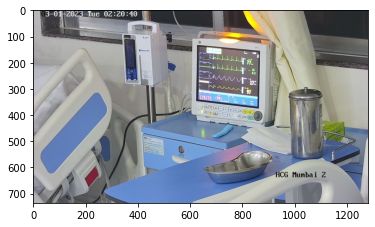

In [5]:
from google.colab.patches import cv2_imshow
data = cv2.imread('im1.png')
plt.imshow(data)  

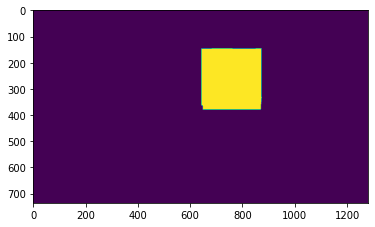

In [140]:

data2 = cv2.imread('mask1.png')
#_, data2 = cv2.threshold(data2, 100, 255, cv2.THRESH_BINARY)
#cv2.bitwise_and(data, data, mask=data2)
kernel = np.ones((20,20), np.uint8)  
data2 = cv2.erode(data2, kernel, iterations=10)  
data2 = cv2.dilate(data2, kernel, iterations=10)  

data2 = cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
_, data2 = cv2.threshold(data2, 100, 255, cv2.THRESH_BINARY)
plt.imshow(data2)


[[306. 217.]
 [688. 228.]
 [679. 524.]
 [302. 508.]] 0


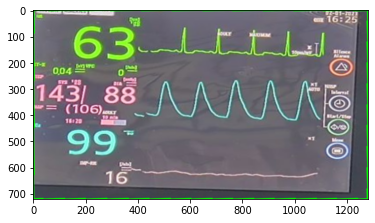

[[632. 136.]
 [884. 135.]
 [881. 391.]
 [632. 391.]] 1


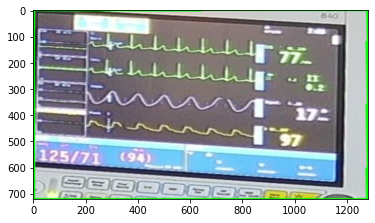

[[438. 211.]
 [936. 185.]
 [943. 584.]
 [446. 615.]] 2


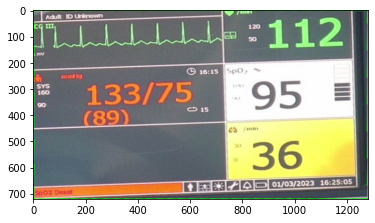

[[532. 111.]
 [879. 101.]
 [883. 427.]
 [534. 444.]] 3


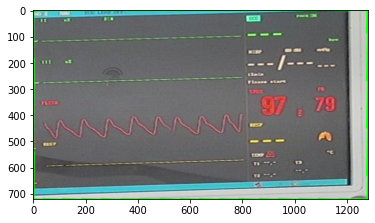

[[308. 312.]
 [734. 295.]
 [727. 686.]
 [295. 713.]] 4


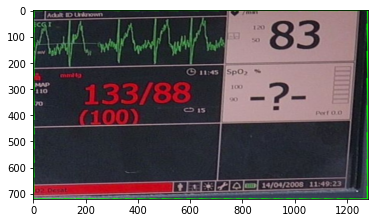

[[381. 161.]
 [881. 142.]
 [894. 533.]
 [390. 546.]] 5


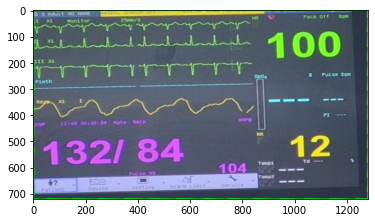

[[447. 228.]
 [947. 224.]
 [946. 549.]
 [446. 553.]] 6


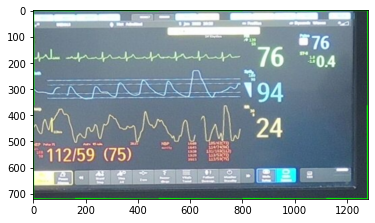

[[375. 115.]
 [884.  72.]
 [888. 457.]
 [383. 506.]] 7


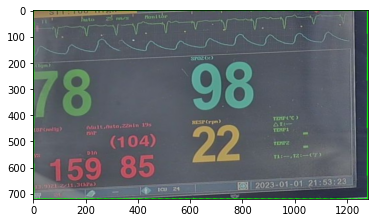

[[427. 212.]
 [930. 186.]
 [937. 585.]
 [435. 616.]] 8


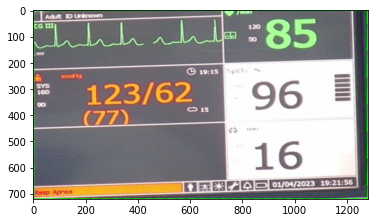

[[417. 135.]
 [907. 127.]
 [922. 554.]
 [427. 558.]] 9


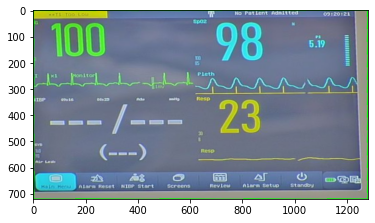

[[ 70. 155.]
 [627. 142.]
 [620. 593.]
 [ 60. 589.]] 10


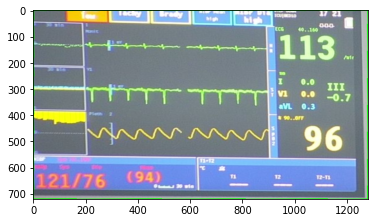

[[ 293.   99.]
 [1036.   57.]
 [1059.  475.]
 [ 311.  511.]] 11


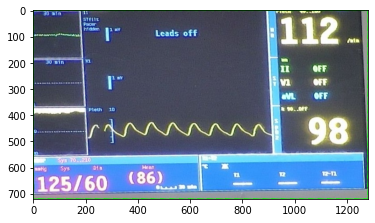

[[ 415.   90.]
 [1009.   54.]
 [1037.  470.]
 [ 433.  467.]] 12


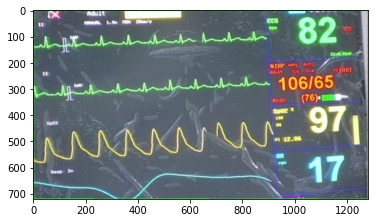

[[441. 231.]
 [917. 220.]
 [921. 468.]
 [442. 474.]] 13


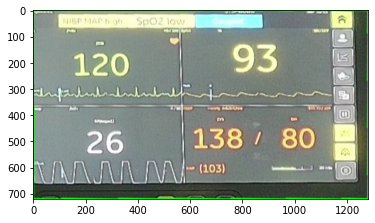

[[ 469.  160.]
 [1084.  144.]
 [1055.  599.]
 [ 472.  640.]] 14


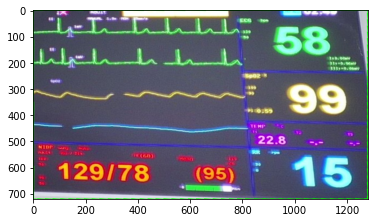

[[438. 228.]
 [909. 230.]
 [898. 605.]
 [429. 603.]] 15


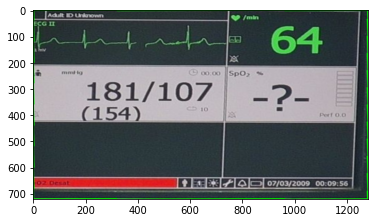

[[391. 112.]
 [798. 106.]
 [803. 414.]
 [398. 416.]] 16


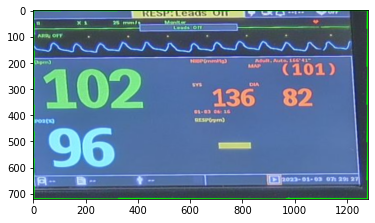

[[ 442.  137.]
 [1019.  123.]
 [1026.  431.]
 [ 450.  452.]] 17


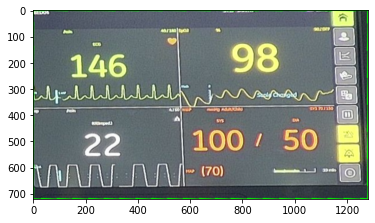

[[506. 300.]
 [771. 297.]
 [771. 532.]
 [506. 543.]] 18


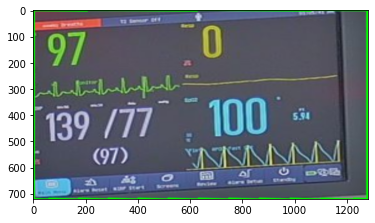

[[279. 219.]
 [640. 201.]
 [645. 534.]
 [286. 562.]] 19


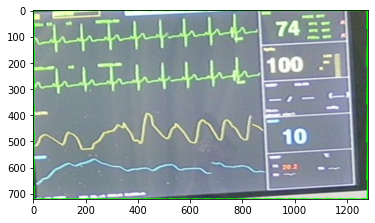

In [8]:
from scipy.spatial import distance as dist
def order_points(pts):
	
  xSorted = pts[np.argsort(pts[:, 0]), :]
	
  leftMost = xSorted[:2, :]
  rightMost = xSorted[2:, :]
	
  leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
  (tl, bl) = leftMost
	
  D = dist.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
  (br, tr) = rightMost[np.argsort(D)[::-1], :]
	
  return np.array([tl, tr, br, bl], dtype="float32")

for i in range(0,20):
  data = cv2.imread(f'im{i}.png')

  data2 = cv2.imread(f'mask{i}.png')
  #_, data2 = cv2.threshold(data2, 100, 255, cv2.THRESH_BINARY)
  #cv2.bitwise_and(data, data, mask=data2)
  kernel = np.ones((20,20), np.uint8)  
  data2 = cv2.erode(data2, kernel, iterations=10)  
  data2 = cv2.dilate(data2, kernel, iterations=11)  

  data2 = cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
  _, data2 = cv2.threshold(data2, 70, 255, cv2.THRESH_BINARY)
  # cv2_imshow(data)
  # cv2_imshow(data2)

  cnts = cv2.findContours(data2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

  

  for count in cnts:
      cnt = cv2.convexHull(count, False)
      epsilon = 0.01 * cv2.arcLength(cnt, True)
      approximations = cv2.approxPolyDP(cnt, epsilon, True)
      for ep in range(1, 5):
        epsilon = ep*0.01 * cv2.arcLength(cnt, True)
        approximations = cv2.approxPolyDP(cnt, epsilon, True)
        if len(approximations) == 4:
          break
      # print(len(approximations))
      img = cv2.drawContours(data, [approximations], 0, (0, 255, 0), 2)
      
      # cv2_imshow(img)
      
      h, w = 720, 1280
      
      pt1 = np.float32([approximations[0][0], approximations[1][0], approximations[2][0], approximations[3][0]])
      pt1 = order_points(pt1)
      # cv2.rectangle(data, approximations[0][0])
      #print(pt1, pt1.shape)
      print(pt1, i)
      pt2 = np.float32([[0, 0], [w, 0], [w, h], [0, h]])

      matrix = cv2.getPerspectiveTransform(pt1, pt2)
      result = cv2.warpPerspective(data, matrix, (w, h))
      #result = cv2.flip(result, 0)
      #result = cv2.rotate(result, cv2.ROTATE_90_CLOCKWISE)


      plt.imshow(result)
      
      break
  plt.show()